In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Read the AMD Historical Closing Prices
amd_path = Path("amd_historical.csv")
amd_df = pd.read_csv(amd_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
amd_df.sort_index(inplace=True)
amd_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-15,AMD,12.45
2018-05-16,AMD,12.82
2018-05-17,AMD,12.82
2018-05-18,AMD,13.00
2018-05-21,AMD,12.99


In [3]:
# Read the AMD Historical Closing Prices
mu_path = Path("mu_historical.csv")
mu_df = pd.read_csv(mu_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
mu_df.sort_index(inplace=True)
mu_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-15,MU,54.01
2018-05-16,MU,56.50
2018-05-17,MU,54.70
2018-05-18,MU,53.39
2018-05-21,MU,55.48


In [4]:
# Create a new pivot table where the columns are the closing prices for each ticker
#first concat by row
all_prices = pd.concat([amd_df, mu_df], axis="rows", join="inner")
#second, reset the index
all_prices.reset_index()
#then create the pivot table
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

Symbol,AMD,MU
Trade DATE,,
2018-05-15,12.45,54.01
2018-05-16,12.82,56.50
2018-05-17,12.82,54.70
2018-05-18,13.00,53.39
2018-05-21,12.99,55.48


In [6]:
# Calculate Daily Returns
daily_returns = all_prices.pct_change()
daily_returns.head()

Symbol,AMD,MU
Trade DATE,,
2018-05-15,NaN,NaN
2018-05-16,0.029719,0.046103
2018-05-17,0.000000,-0.031858
2018-05-18,0.014041,-0.023949
2018-05-21,-0.000769,0.039146


In [7]:
# Calculate Portfolio Returns with an equal amount of each stock
amd_weight = 0.5
mu_weight = 0.5

weighted_returns = (amd_weight*daily_returns["AMD"] + mu_weight*daily_returns["MU"])
weighted_returns.head()

Trade DATE
2018-05-15         NaN
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
dtype: float64

<AxesSubplot:xlabel='Trade DATE'>

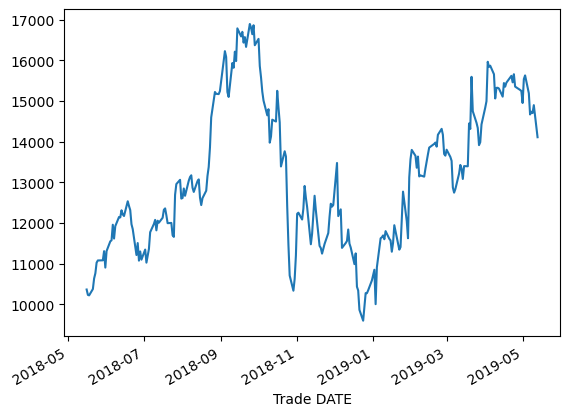

In [10]:
# Higher Volalitity Portfolio (More risk, but potentially higher returns)
initial_investment = 10000
weights = [0.6, 0.4]
portfolio_returns = daily_returns.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()

(initial_investment * cumulative_returns).plot()